In [1]:
#Imports and Dependancies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Linear Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Tree Based Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Machine Learning proccessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
#Read in CSVs
train_df = pd.read_csv("Resources/2019loans.csv")
test_df = pd.read_csv("Resources/2020Q1loans.csv")

In [3]:
#Drop index columns
train_df.drop(['Unnamed: 0', 'index', ], axis=1, inplace=True)
test_df.drop(['Unnamed: 0', 'index', ], axis=1, inplace=True)

In [4]:
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [5]:
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   12180 non-null  float64
 1   int_rate                    12180 non-null  float64
 2   installment                 12180 non-null  float64
 3   home_ownership              12180 non-null  object 
 4   annual_inc                  12180 non-null  float64
 5   verification_status         12180 non-null  object 
 6   loan_status                 12180 non-null  object 
 7   pymnt_plan                  12180 non-null  object 
 8   dti                         12180 non-null  float64
 9   delinq_2yrs                 12180 non-null  float64
 10  inq_last_6mths              12180 non-null  float64
 11  open_acc                    12180 non-null  float64
 12  pub_rec                     12180 non-null  float64
 13  revol_bal                   121

In [7]:
#Loan_status as target

In [8]:
train_df.loan_status.value_counts()

high_risk    6090
low_risk     6090
Name: loan_status, dtype: int64

In [10]:
#Pull string columns out for encoding 
#Loop to pull string columns
str_cols = []

for col in train_df.columns:
    if (train_df[col].dtype == object) & (col != "loan_status"):
        print(col)
        str_cols.append(col)
        
df_str = train_df.loc[:, str_cols]
df_str.head()

home_ownership
verification_status
pymnt_plan
initial_list_status
application_type
hardship_flag
debt_settlement_flag


,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,MORTGAGE,Source Verified,n,w,Individual,N,N
2,MORTGAGE,Source Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,MORTGAGE,Source Verified,n,w,Individual,N,N


In [11]:
#Pull value counts for string columns
for col in df_str.columns:
    print(col)
    print(df_str[col].value_counts())
    print()

home_ownership
MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65
Name: home_ownership, dtype: int64

verification_status
Not Verified       5301
Source Verified    4881
Verified           1998
Name: verification_status, dtype: int64

pymnt_plan
n    12180
Name: pymnt_plan, dtype: int64

initial_list_status
w    11158
f     1022
Name: initial_list_status, dtype: int64

application_type
Individual    10400
Joint App      1780
Name: application_type, dtype: int64

hardship_flag
N    11832
Y      348
Name: hardship_flag, dtype: int64

debt_settlement_flag
N    12175
Y        5
Name: debt_settlement_flag, dtype: int64



In [12]:
#Drop columns that don't need encoding 
df_str.drop(["pymnt_plan", "debt_settlement_flag"], axis=1, inplace=True) 

In [13]:
#Label encoding
df_le = df_str.loc[:, ["initial_list_status", "application_type", "hardship_flag"]]
df_le["initial_list_status"] = [1 if x == "f" else 0 for x in df_le.initial_list_status]
df_le["application_type"] = [1 if x == "Joint App" else 0 for x in df_le.application_type]
df_le["hardship_flag"] = [1 if x == "Y" else 0 for x in df_le.hardship_flag]

df_le.head()

,initial_list_status,application_type,hardship_flag
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [14]:
#OneHotEncoding remaining columns
df_oh = pd.get_dummies(df_str.loc[:, ["home_ownership", "verification_status"]])
df_oh.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0
3,0,0,0,1,1,0,0
4,0,1,0,0,0,1,0


In [16]:
#Pull numerical columns for scaling 
num_cols = []

for col in train_df.columns:
    if (train_df[col].dtype != object) & (col != "loan_status"):
        print(col)
        num_cols.append(col)
df_num = train_df.loc[:, num_cols]
df_num.head()

loan_amnt
int_rate
installment
annual_inc
dti
delinq_2yrs
inq_last_6mths
open_acc
pub_rec
revol_bal
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
collections_12_mths_ex_med
policy_code
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_inq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
pub_rec_bankru

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0


In [17]:
#save a copy of unscaled
df_ns = df_num.copy()
df_ns.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0


In [19]:
#Scaling Numerical data
scaler = StandardScaler().fit(df_num)
df_scale = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)
df_scale.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,...,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,...,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,...,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,...,-0.148869,0.823591,0.617581,-0.482592,2.682121,0.0,-0.815953,-0.706007,-0.321269,-0.783830
4,1.230781,0.385387,1.857873,0.255933,0.216736,-0.320026,1.759668,0.051947,-0.351986,2.116088,...,-0.148869,-0.182561,0.617581,0.992851,-0.351986,0.0,0.438026,0.790900,2.031592,0.049082


In [20]:
#non-scaled training dataset
df_ns_train = pd.concat([df_ns, df_oh, df_le], axis=1)
df_ns_train["loan_status"] = train_df.loan_status

df_ns_train["loan_status"] = [1 if x == "high_risk" else 0 for x in df_ns_train.loan_status]
df_ns_train.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,1,0,0,1,0,0,0,0,0,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,1,0,0,0,1,0,0,0,0,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,1,0,0,0,1,0,0,0,0,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0,0,1,1,0,0,0,0,0,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,1,0,0,0,1,0,0,0,0,0


In [21]:
#scaled training set
df_train_scale = pd.concat([df_scale, df_oh, df_le], axis=1)
df_train_scale["loan_status"] = train_df.loan_status

df_train_scale["loan_status"] = [1 if x == "high_risk" else 0 for x in df_train_scale.loan_status]
df_train_scale.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,...,1,0,0,1,0,0,0,0,0,0
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,...,1,0,0,0,1,0,0,0,0,0
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,...,1,0,0,0,1,0,0,0,0,0
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,...,0,0,1,1,0,0,0,0,0,0
4,1.230781,0.385387,1.857873,0.255933,0.216736,-0.320026,1.759668,0.051947,-0.351986,2.116088,...,1,0,0,0,1,0,0,0,0,0


In [22]:
#Looking at correlations to see which columns to use in modeling 
corrs = abs(df_train_scale.corr())["loan_status"].sort_values(ascending=False)
corrs

loan_status                1.000000
int_rate                   0.241308
total_rec_int              0.208996
total_rec_late_fee         0.124084
out_prncp_inv              0.101959
                             ...   
recoveries                      NaN
collection_recovery_fee         NaN
policy_code                     NaN
num_tl_120dpd_2m                NaN
tax_liens                       NaN
Name: loan_status, Length: 87, dtype: float64

In [23]:
corrs.index

Index(['loan_status', 'int_rate', 'total_rec_int', 'total_rec_late_fee',
       'out_prncp_inv', 'out_prncp', 'installment', 'acc_open_past_24mths',
       'inq_last_6mths', 'hardship_flag', 'num_tl_op_past_12m',
       'mths_since_recent_inq', 'inq_last_12m', 'total_bc_limit',
       'open_rv_24m', 'bc_open_to_buy', 'mo_sin_old_rev_tl_op',
       'total_rec_prncp', 'open_acc_6m', 'open_rv_12m',
       'mo_sin_rcnt_rev_tl_op', 'max_bal_bc', 'inq_fi', 'last_pymnt_amnt',
       'percent_bc_gt_75', 'home_ownership_MORTGAGE', 'loan_amnt', 'all_util',
       'mths_since_recent_bc', 'total_rev_hi_lim', 'mort_acc',
       'mo_sin_rcnt_tl', 'il_util', 'open_il_24m', 'open_il_12m', 'bc_util',
       'mo_sin_old_il_acct', 'delinq_2yrs', 'verification_status_Verified',
       'home_ownership_RENT', 'pct_tl_nvr_dlq', 'total_pymnt_inv',
       'total_pymnt', 'tot_hi_cred_lim', 'home_ownership_OWN',
       'num_actv_rev_tl', 'num_rev_tl_bal_gt_0',
       'verification_status_Not Verified', 'applicat

In [24]:
#Dropping null or low corr columns
cols_drop = ['num_sats', 'open_acc',
       'num_tl_90g_dpd_24m', 'delinq_amnt', 'acc_now_delinq', 'num_tl_30dpd',
       'annual_inc', 'chargeoff_within_12_mths', 'total_il_high_credit_limit',
       'total_bal_ex_mort', 'tot_coll_amt', 'pub_rec',
       'pub_rec_bankruptcies', 'total_acc', 'num_il_tl', 'recoveries',
       'collection_recovery_fee', 'policy_code', 'num_tl_120dpd_2m', 'tax_liens']

cols_keep = [x for x in df_train_scale if x not in cols_drop]
df_train_scale = df_train_scale.loc[:, cols_keep]
df_train_scale.head()

,loan_amnt,int_rate,installment,dti,delinq_2yrs,inq_last_6mths,revol_bal,out_prncp,out_prncp_inv,total_pymnt,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,-0.393112,0.736585,-0.087609,0.309615,-0.320026,-0.695401,0.979339,-0.071368,-0.071217,-1.093789,...,1,0,0,1,0,0,0,0,0,0
1,0.351681,-0.191716,-0.103427,-0.473994,2.170653,-0.695401,-0.354346,0.195949,0.196078,0.736269,...,1,0,0,0,1,0,0,0,0,0
2,0.254003,-0.320805,-0.204342,-0.473157,-0.320026,-0.695401,-0.039187,0.260977,0.261102,0.118673,...,1,0,0,0,1,0,0,0,0,0
3,-1.406519,-0.320805,-1.388060,-0.188665,-0.320026,-0.695401,-0.388681,-1.195351,-1.195107,-1.269408,...,0,0,1,1,0,0,0,0,0,0
4,1.230781,0.385387,1.857873,0.216736,-0.320026,1.759668,2.116088,0.836271,0.836348,1.688594,...,1,0,0,0,1,0,0,0,0,0


In [25]:
#applying to non scaled set

df_ns_train = df_ns_train.loc[:, cols_keep]
df_ns_train.head()

,loan_amnt,int_rate,installment,dti,delinq_2yrs,inq_last_6mths,revol_bal,out_prncp,out_prncp_inv,total_pymnt,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,13375.0,0.1797,483.34,29.99,0.0,0.0,39728.0,12804.66,12804.66,953.33,...,1,0,0,1,0,0,0,0,0,0
1,21000.0,0.1308,478.68,11.26,2.0,0.0,9585.0,15152.97,15152.97,10037.02,...,1,0,0,0,1,0,0,0,0,0
2,20000.0,0.1240,448.95,11.28,0.0,0.0,16708.0,15724.23,15724.23,6971.52,...,1,0,0,0,1,0,0,0,0,0
3,3000.0,0.1240,100.22,18.08,0.0,0.0,8809.0,2930.77,2930.77,81.63,...,0,0,1,1,0,0,0,0,0,0
4,30000.0,0.1612,1056.49,27.77,0.0,2.0,65420.0,20778.03,20778.03,14763.99,...,1,0,0,0,1,0,0,0,0,0


In [26]:
#apply same transformations to test dataset 
df_test = test_df.copy()

df_str_test = df_test.loc[:, str_cols]


df_str_test.drop(["pymnt_plan", "debt_settlement_flag"], axis=1, inplace=True)

#Label Encoding
df_le_test = df_str_test.loc[:, ["initial_list_status", "application_type", "hardship_flag"]]
df_le_test["initial_list_status"] = [1 if x == "f" else 0 for x in df_le_test.initial_list_status]
df_le_test["application_type"] = [1 if x == "Joint App" else 0 for x in df_le_test.application_type]
df_le_test["hardship_flag"] = [1 if x == "Y" else 0 for x in df_le_test.hardship_flag]

df_le_test.head()

,initial_list_status,application_type,hardship_flag
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [27]:
 df_oh_test = pd.get_dummies(df_str_test.loc[:, ["home_ownership", "verification_status"]])
df_oh_test.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,1,0,0
1,0,0,0,1,1,0,0
2,0,0,0,1,1,0,0
3,0,0,0,1,1,0,0
4,0,0,0,1,1,0,0


In [28]:
df_num_test = df_test.loc[:, num_cols]
df_scale_test = pd.DataFrame(scaler.transform(df_num_test), columns=df_num_test.columns)
df_scale_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,2.207559,-1.120016,1.037148,0.297493,-0.118797,-0.320026,0.532133,0.864373,-0.351986,-0.359390,...,-0.148869,-0.182561,0.358842,-0.975390,-0.351986,0.0,1.710119,0.144260,1.838152,0.830624
1,-1.113486,0.218331,-1.019839,-0.207167,-0.463116,2.170653,-0.695401,-0.760478,-0.351986,-0.721803,...,-0.148869,-0.685637,-3.128502,-0.975390,-0.351986,0.0,-0.854304,-0.660250,-0.873954,-0.625935
2,-1.347913,0.542951,-1.292848,-0.284351,-0.663097,-0.320026,-0.695401,-1.085448,-0.351986,-0.567962,...,-0.148869,-0.685637,0.617581,-0.975390,-0.351986,0.0,-0.914226,-0.732760,-0.818685,-0.791627
3,0.254003,0.218331,-0.104615,0.060006,-0.437596,-0.320026,1.759668,-0.922963,-0.351986,-0.215151,...,-0.148869,0.823591,0.617581,0.500053,-0.351986,0.0,-0.740712,-0.315128,-0.562082,-0.388709
4,-1.347913,-0.320805,-1.320003,-0.236853,-0.272339,-0.320026,2.987203,-1.085448,-0.351986,-0.317711,...,-0.148869,0.320515,0.617581,-0.237668,-0.351986,0.0,-0.795312,-0.507872,-0.277843,-0.600029


In [29]:
df_ns_test = df_num_test.copy()
df_ns_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0


In [30]:
df_test_scale = pd.concat([df_scale_test, df_oh_test, df_le_test], axis=1)
df_test_scale["loan_status"] = test_df.loan_status

df_test_scale["loan_status"] = [1 if x == "high_risk" else 0 for x in df_test_scale.loan_status]
df_test_scale.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,2.207559,-1.120016,1.037148,0.297493,-0.118797,-0.320026,0.532133,0.864373,-0.351986,-0.359390,...,1,0,0,1,0,0,0,0,0,0
1,-1.113486,0.218331,-1.019839,-0.207167,-0.463116,2.170653,-0.695401,-0.760478,-0.351986,-0.721803,...,0,0,1,1,0,0,0,0,0,0
2,-1.347913,0.542951,-1.292848,-0.284351,-0.663097,-0.320026,-0.695401,-1.085448,-0.351986,-0.567962,...,0,0,1,1,0,0,0,0,0,0
3,0.254003,0.218331,-0.104615,0.060006,-0.437596,-0.320026,1.759668,-0.922963,-0.351986,-0.215151,...,0,0,1,1,0,0,0,0,0,0
4,-1.347913,-0.320805,-1.320003,-0.236853,-0.272339,-0.320026,2.987203,-1.085448,-0.351986,-0.317711,...,0,0,1,1,0,0,0,0,0,0


In [31]:
df_test_scale = df_test_scale.loc[:, cols_keep]
df_test_scale.head()

,loan_amnt,int_rate,installment,dti,delinq_2yrs,inq_last_6mths,revol_bal,out_prncp,out_prncp_inv,total_pymnt,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,2.207559,-1.120016,1.037148,-0.118797,-0.320026,0.532133,-0.359390,2.255996,2.255958,0.676429,...,1,0,0,1,0,0,0,0,0,0
1,-1.113486,0.218331,-1.019839,-0.463116,2.170653,-0.695401,-0.721803,-1.528971,-1.528701,-0.039665,...,0,0,1,1,0,0,0,0,0,0
2,-1.347913,0.542951,-1.292848,-0.663097,-0.320026,-0.695401,-0.567962,-1.528971,-1.528701,-0.559823,...,0,0,1,1,0,0,0,0,0,0
3,0.254003,0.218331,-0.104615,-0.437596,-0.320026,1.759668,-0.215151,0.477242,0.477349,-0.325590,...,0,0,1,1,0,0,0,0,0,0
4,-1.347913,-0.320805,-1.320003,-0.272339,-0.320026,2.987203,-0.317711,-1.528971,-1.528701,-0.560075,...,0,0,1,1,0,0,0,0,0,0


In [32]:
#Test set non scaled
df_test_ns = pd.concat([df_ns_test, df_oh_test, df_le_test], axis=1)
df_test_ns["loan_status"] = test_df.loan_status

df_test_ns["loan_status"] = [1 if x == "high_risk" else 0 for x in df_test_ns.loan_status]
df_test_ns.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,1,0,0,1,0,0,0,0,0,0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,0,1,1,0,0,0,0,0,0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,0,1,1,0,0,0,0,0,0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,0,1,1,0,0,0,0,0,0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,0,1,1,0,0,0,0,0,0


In [33]:
df_test_ns = df_test_ns.loc[:, cols_keep]
df_test_ns.head()

,loan_amnt,int_rate,installment,dti,delinq_2yrs,inq_last_6mths,revol_bal,out_prncp,out_prncp_inv,total_pymnt,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,40000.0,0.0819,814.70,19.75,0.0,1.0,9471.0,33249.95,33249.95,9740.00,...,1,0,0,1,0,0,0,0,0,0
1,6000.0,0.1524,208.70,11.52,2.0,0.0,1280.0,0.00,0.00,6185.59,...,0,0,1,1,0,0,0,0,0,0
2,3600.0,0.1695,128.27,6.74,0.0,0.0,4757.0,0.00,0.00,3603.73,...,0,0,1,1,0,0,0,0,0,0
3,20000.0,0.1524,478.33,12.13,0.0,2.0,12731.0,17624.06,17624.06,4766.37,...,0,0,1,1,0,0,0,0,0,0
4,3600.0,0.1240,120.27,16.08,0.0,3.0,10413.0,0.00,0.00,3602.48,...,0,0,1,1,0,0,0,0,0,0


# Predictions for scaled vs non scaled

Seeing that there's a large variation in loan amounts and interest rates, and with both of those sets being large contributing factors in the deciding loan status based on correlation, leaving these columns unscaled will make it harder for the algorithms to predict accurately. Scaling these numbers to factors of standard deviation will allow the models, the tree based algorithms will perform better and more accurately.

# Machine Learning Models

## Unscaled Data

In [36]:
#Setting variables
X_train = df_ns_train.drop(["loan_status", "home_ownership_ANY", "verification_status_Not Verified"], axis=1).values
y_train = df_ns_train["loan_status"].values

X_test = df_test_ns.drop(["loan_status", "home_ownership_ANY", "verification_status_Not Verified"], axis=1).values
y_test = df_test_ns["loan_status"].values

In [37]:
#Helper function to run algorithms
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

TRAINING SET
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      6090
           1       0.68      0.58      0.63      6090

    accuracy                           0.65     12180
   macro avg       0.66      0.65      0.65     12180
weighted avg       0.66      0.65      0.65     12180

[[4385 1705]
 [2529 3561]]

Testing SET
              precision    recall  f1-score   support

           0       0.51      0.73      0.60      2351
           1       0.53      0.31      0.39      2351

    accuracy                           0.52      4702
   macro avg       0.52      0.52      0.50      4702
weighted avg       0.52      0.52      0.50      4702

[[1710  641]
 [1617  734]]


C:\Users\malad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


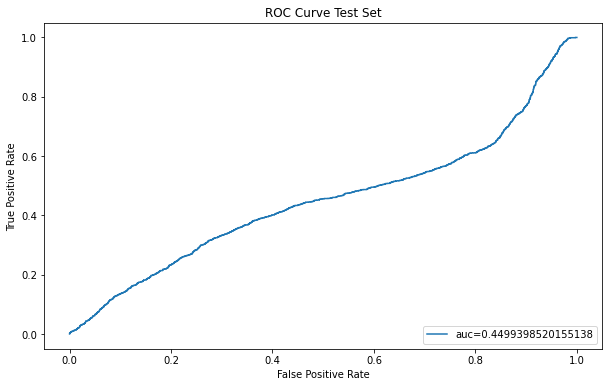

In [38]:
#Linear Regression
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.68      0.44      0.53      2351
           1       0.59      0.79      0.67      2351

    accuracy                           0.61      4702
   macro avg       0.63      0.61      0.60      4702
weighted avg       0.63      0.61      0.60      4702

[[1037 1314]
 [ 498 1853]]


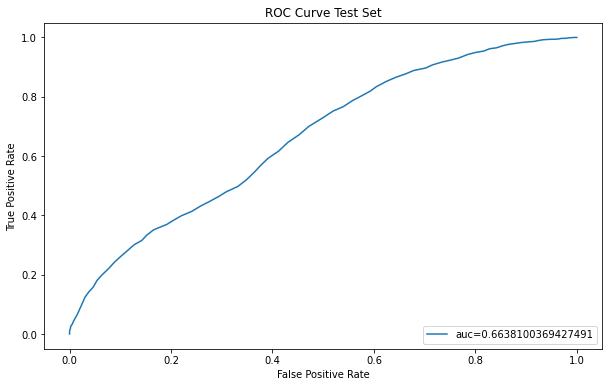

In [40]:
#RandomForest 
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

## Scaled Models

In [42]:
X_train = df_train_scale.drop(["loan_status", "home_ownership_ANY", "verification_status_Not Verified"], axis=1).values
y_train = df_train_scale["loan_status"].values

X_test = df_test_scale.drop(["loan_status", "home_ownership_ANY", "verification_status_Not Verified"], axis=1).values
y_test = df_test_scale["loan_status"].values

TRAINING SET
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      6090
           1       0.73      0.66      0.69      6090

    accuracy                           0.71     12180
   macro avg       0.71      0.71      0.71     12180
weighted avg       0.71      0.71      0.71     12180

[[4594 1496]
 [2071 4019]]

Testing SET
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2351
           1       0.78      0.77      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702

[[1835  516]
 [ 547 1804]]


C:\Users\malad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


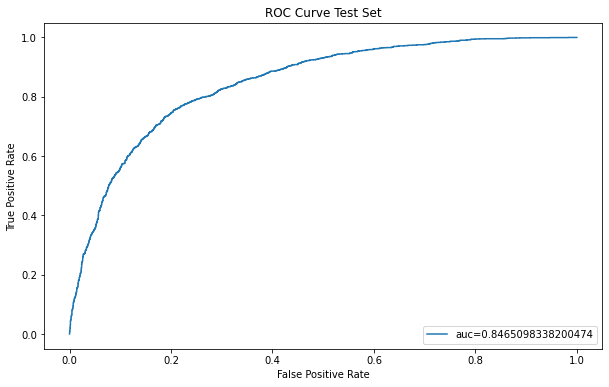

In [44]:
#Logistic Regression
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.68      0.44      0.54      2351
           1       0.59      0.79      0.67      2351

    accuracy                           0.62      4702
   macro avg       0.63      0.62      0.60      4702
weighted avg       0.63      0.62      0.60      4702

[[1040 1311]
 [ 496 1855]]


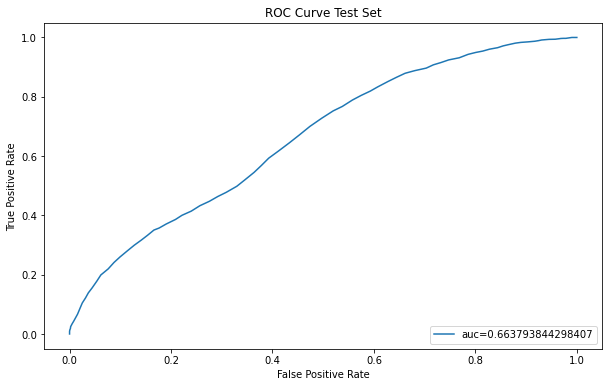

In [45]:
#RandomForest
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

## Gradient Boosters

TRAINING SET
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      6090
           1       0.89      0.86      0.87      6090

    accuracy                           0.87     12180
   macro avg       0.87      0.87      0.87     12180
weighted avg       0.87      0.87      0.87     12180

[[5419  671]
 [ 856 5234]]

Testing SET
              precision    recall  f1-score   support

           0       0.71      0.47      0.57      2351
           1       0.61      0.81      0.69      2351

    accuracy                           0.64      4702
   macro avg       0.66      0.64      0.63      4702
weighted avg       0.66      0.64      0.63      4702

[[1115 1236]
 [ 455 1896]]


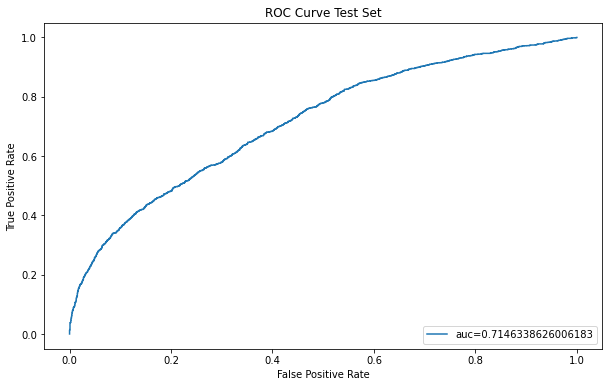

In [46]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      6090
           1       0.78      0.72      0.75      6090

    accuracy                           0.76     12180
   macro avg       0.76      0.76      0.76     12180
weighted avg       0.76      0.76      0.76     12180

[[4867 1223]
 [1680 4410]]

Testing SET
              precision    recall  f1-score   support

           0       0.59      0.69      0.63      2351
           1       0.62      0.52      0.56      2351

    accuracy                           0.60      4702
   macro avg       0.60      0.60      0.60      4702
weighted avg       0.60      0.60      0.60      4702

[[1611  740]
 [1137 1214]]


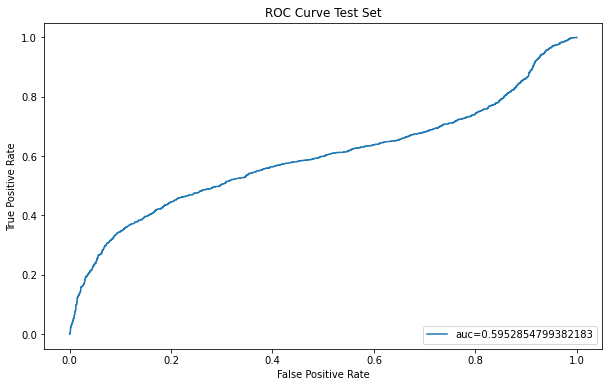

In [47]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6090
           1       0.97      0.97      0.97      6090

    accuracy                           0.97     12180
   macro avg       0.97      0.97      0.97     12180
weighted avg       0.97      0.97      0.97     12180

[[5934  156]
 [ 210 5880]]

Testing SET
              precision    recall  f1-score   support

           0       0.62      0.49      0.55      2351
           1       0.58      0.69      0.63      2351

    accuracy                           0.59      4702
   macro avg       0.60      0.59      0.59      4702
weighted avg       0.60      0.59      0.59      4702

[[1159 1192]
 [ 721 1630]]


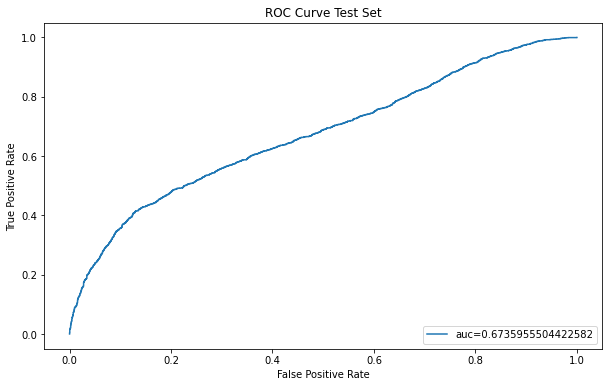

In [48]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

# Conclusions

As said in the predictions, the scaled models outperformed the unscaled models. With the numerical data scaled to factors of standard deviations, more accurate models were able to be produced. Out of curiosity I also ran the data through some booster machines and found that they either performed poorly or over-fit the testing data. Using scaled numerical data and a linear regression model found the best results.